In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

In [2]:
def minkowski_distance(x, point, p):
    return np.sum(np.abs(x - point) ** p, axis=1) ** (1 / p)

In [3]:
def regression(x_train, y_train, k, p):
    predictions = []
    for i in range(x_train.shape[0]):
        # Calculate distances using minkowski_distance
        distances = minkowski_distance(x_train, x_train[i], p)
        # Find the indices of the k nearest neighbors using np.argpartition (more efficient than sorting)
        nearest_neighbors = np.argpartition(distances, k + 1)[1:k+1]  # exclude self (i)
        # Predict by averaging the y_train values of the nearest neighbors
        predictions.append(np.mean(y_train[nearest_neighbors]))
    return np.array(predictions)

In [4]:
data = pd.read_csv('linear_train.csv')
df = data.to_numpy()

In [5]:
x_train = df[:, 0:20]
y_train = df[:, 20]

In [11]:
y_hat = regression(x_train, y_train, k=4, p=2)
print("Predicted values:", y_hat)

Predicted values: [ -92.79890075 -393.35195332  380.22175233 ...    1.59606835  409.00598985
 -210.02483384]


In [27]:
mean_absolute_error_1 = np.mean(np.abs(y_hat - y_train))
print("Mean Absolute Error:", mean_absolute_error_1)

Mean Absolute Error: 135.71225900236612


In [ ]:
# Create the k-nearest neighbors regressor
k = 4
knn = KNeighborsRegressor(n_neighbors=k, p=2)

# Fit the model
knn.fit(x_train, y_train)

# Predict using the model
y_hat_sk = knn.predict(x_train)

In [32]:
from sklearn.metrics import mean_absolute_error  # Ensure correct import

mean_absolute_error_value = mean_absolute_error(y_train, y_hat_sk)
print("Mean Absolute Error:", mean_absolute_error_value)

Mean Absolute Error: 120.55253846077788


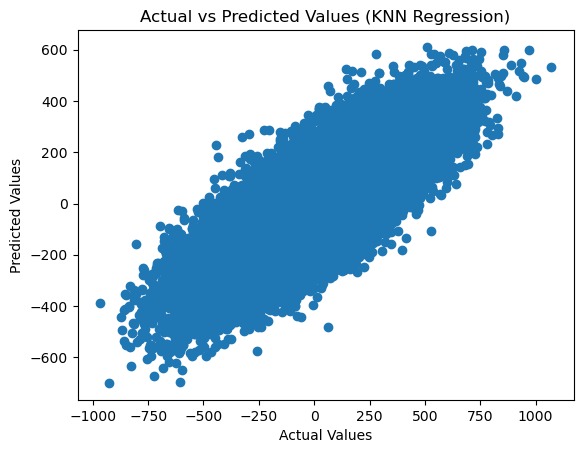

In [25]:
plt.scatter(y_train, y_hat_sk)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (KNN Regression)')
plt.show()